# Introduction
This note contains a few examples demonstrating how to use the Circuit class in AUSCC. First you will need to import AUSCC and Sympy:

In [1]:
import auscc as au
import sympy as sp
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

In most cases one would you would probably also want QuTiP and Numpy imported, since these are heavily used. It also realy nice to set sympy to print latex:

In [2]:
sp.init_printing()

# Transmon with readout resonator
## Circuit building
Let's build a transmon with readout resonator as in the original Koch et al paper. 
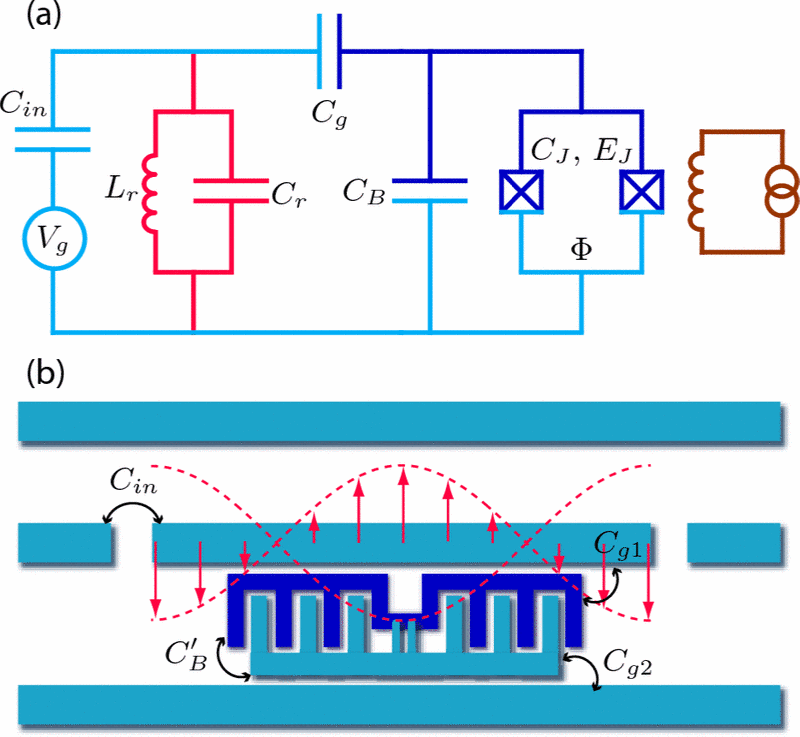
Building a circuit is done with the __add_branch__ method as shown below.

In [3]:
fn = sp.symbols('phi_0:3')
circ = au.Circuit(fn)
Cr, Lr, Cin, Cg, EJ, CB, CJ, Vg, Phi = sp.symbols('C_r, L_r, C_in, C_g, E_J, C_B, C_J, V_g, Phi')
circ.add_branch(start=fn[0], end=fn[1], type='Capacitor', symbol = Cr)
circ.add_branch(start=fn[0], end=fn[1], type='Inductor', symbol = Lr)
circ.add_branch(start=fn[0], end=fn[1], type='Capacitor', symbol = Cin, bias_voltage = Vg)
circ.add_branch(start=fn[1], end=fn[2], type='Capacitor', symbol = Cg)
circ.add_branch(start=fn[0], end=fn[2], type='Capacitor', symbol = CB)
circ.add_branch(start=fn[0], end=fn[2], type='Josephson Junction', symbol = EJ, bias_flux = -Phi/2)
circ.add_branch(start=fn[0], end=fn[2], type='Josephson Junction', symbol = EJ, bias_flux = Phi/2)

We can get check the info we put into the circuit using the info method:

In [4]:
circ.info('Circuit')

Circuit with 3 node(s)

Circuit parameters:
C_r	L_r	C_in	C_g	C_B	E_J	

Control parameters:
V_g	Phi	

Branches:
Capacitor           C_r        from phi_0 to phi_1
Inductor            L_r        from phi_0 to phi_1
Capacitor           C_in       from phi_0 to phi_1, Bias voltage: V_g
Capacitor           C_g        from phi_1 to phi_2
Capacitor           C_B        from phi_0 to phi_2
Josephson junction  E_J        from phi_0 to phi_2, Bias flux: -Phi/2
Josephson junction  E_J        from phi_0 to phi_2, Bias flux: Phi/2



Here the 'Circuit' argument specifies that we want the information about how the circuit is put together. If we instead wanted information about the coordinates used we would call:

In [5]:
circ.info('Coordinates')

Flux nodes:
phi_0	phi_1	phi_2	


So far we have not specified anything other than the nodes of the circuit. We have not even specified which node is ground. We can specify these kinds of things by calling:

In [6]:
phiT, phir = sp.symbols('varphi_T, varphi_r')

# We will set COM to zero
eqs = [(phir, fn[1]-fn[0]), (phiT, fn[2]-fn[0]), (0, fn[0]+fn[1]+fn[2])] 
circ.define_coords(eqs)
circ.info('Coordinates')

Flux nodes:
phi_0	phi_1	phi_2	

Used coordinates:
varphi_r	varphi_T	

Coordinate definitions:
varphi_r = -phi_0 + phi_1
varphi_T = -phi_0 + phi_2
0 = phi_0 + phi_1 + phi_2

Flux nodes expressed using defined coordinates:
phi_0 = -varphi_T/3 - varphi_r/3
phi_1 = -varphi_T/3 + 2*varphi_r/3
phi_2 = 2*varphi_T/3 - varphi_r/3



## Transmon alone
Let's start out by investigating the transmon in isolation. We will do this by defining a simpler circuit with just a voltage and a single josephson junction transmon

In [7]:
circ_simple = au.Circuit(fn[:2])
circ_simple.add_branch(start=fn[0], end=fn[1], type='Capacitor', symbol = Cg, bias_voltage=Vg)
circ_simple.add_branch(start=fn[0], end=fn[1], type='Josephson Junction', symbol = EJ)
circ_simple.define_coords([(0,fn[0]), (phiT,fn[1])])
circ_simple.info('circuit', 'coords')

Circuit with 2 node(s)

Circuit parameters:
C_g	E_J	

Control parameters:
V_g	

Branches:
Capacitor           C_g        from phi_0 to phi_1, Bias voltage: V_g
Josephson junction  E_J        from phi_0 to phi_1
Flux nodes:
phi_0	phi_1	

Used coordinates:
varphi_T	

Coordinate definitions:
0 = phi_0
varphi_T = phi_1

Flux nodes expressed using defined coordinates:
phi_0 = 0
phi_1 = varphi_T



We can then get the potential by calling:

In [8]:
circ_simple.potential()

and the capacitance matrix and charge vector by calling:

In [9]:
circ_simple.capacitance_matrix()

The circuit can be evaluated by calling it:

In [10]:
circ_dict = dict([(Cg, 1),(EJ, 10)])
ctrl_dict = dict([(Vg, 0)])
circ_simple(circ_dict, ctrl_dict)

Quantum object: dims = [[15], [15]], shape = (15, 15), type = oper, isherm = True
Qobj data =
[[34.5 -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [-5.  28.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.  -5.  22.5 -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.  -5.  18.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.  -5.  14.5 -5.   0.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.  -5.  12.  -5.   0.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.  -5.  10.5 -5.   0.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.  -5.  10.  -5.   0.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -5.  10.5 -5.   0.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -5.  12.  -5.   0.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -5.  14.5 -5.   0.   0.
   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  

Information about the quantization method can be found using:

In [11]:
circ_simple.info('Quantization')

Quantization Settings:
dims : [15]
method : ['dft']
zeta : [1]
period : [6.283185307179586]



Let's make a nice figure, and see how the larger capacitance helps with the charge dispersion in the charge qubit. To make it easier we will use units where $C_g = 1$. 

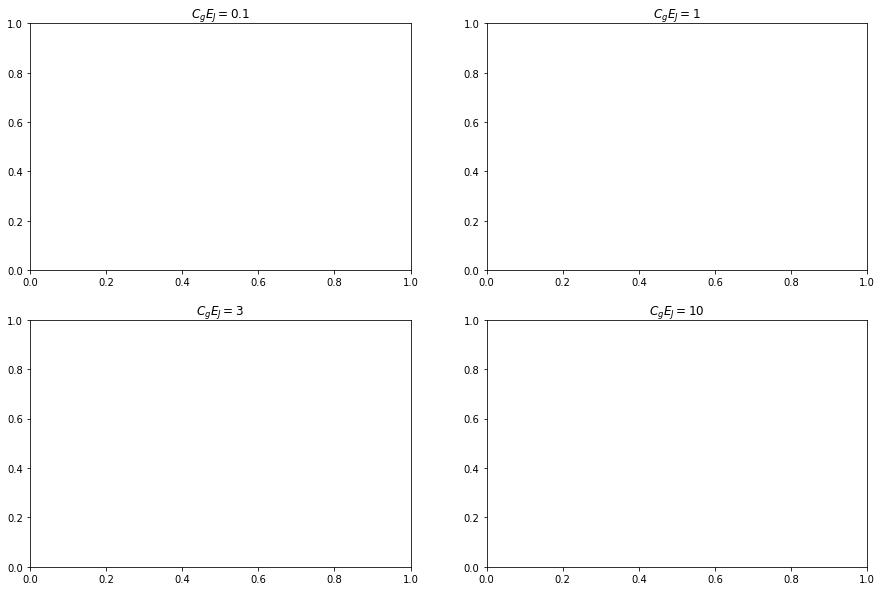

In [12]:
fig, axs = plt.subplots(2,2, figsize = (15,10))
EJs = [0.1, 1, 3, 10]
for i,ax in enumerate(axs.flat):
    circ_dict[EJ] = EJs[i]
    ax.set_title('$'+sp.latex(EJ*Cg)+'={}$'.format(circ_dict[EJ]))
    for vg in np.linspace(-2, 2, 100):
        ctrl_dict[Vg] = vg
#        H = circ_simple(circ_dict,ctrl_dict)
#        E = H.eigenenergies()
#        ax.plot(vg, 0, color = 'k', marker = '.')
#        ax.plot(vg, E[1]-E[0], color = 'b', marker = '.')
#        ax.plot(vg, E[2]-E[0], color = 'r', marker = '.')
#        ax.plot(vg, E[3]-E[0], color = 'g', marker = '.')
plt.show()

In [13]:
print(circ_simple.ops_lib.ops_dict)

{1.0*q_T**2: Quantum object: dims = [[15], [15]], shape = (15, 15), type = oper, isherm = True
Qobj data =
[[49.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 36.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 25.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  9.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 16.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 36.  0.]
 [ 0.  0.  

In [19]:
circ_simple.set_method(['sho'])
circ_simple.set_dims([4])
circ_simple.set_zeta([1/np.sqrt(5)])
circ_simple({EJ : 5, Cg : 1}, ctrl_subs=dict())

4 0.4472135954999579 1


Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.02890684e+00  0.00000000e+00 -1.38013001e-03  0.00000000e+00]
 [ 0.00000000e+00  3.02695504e+00  0.00000000e+00 -2.39045529e-03]
 [-1.38013001e-03  0.00000000e+00  5.02500324e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.39045529e-03  0.00000000e+00  5.02695504e+00]]

In [15]:
qt.displace(10, 1j)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[ 6.06530660e-01+0.j          0.00000000e+00+0.60653066j
  -4.28881942e-01+0.j          0.00000000e+00-0.24761511j
   1.23807527e-01+0.j          0.00000000e+00+0.0553686j
  -2.26030251e-02+0.j          0.00000000e+00-0.00854887j
   2.99672335e-03+0.j          0.00000000e+00+0.00110007j]
 [ 0.00000000e+00+0.60653066j  4.22913871e-10+0.j
   0.00000000e+00+0.42888194j -4.95230260e-01+0.j
   0.00000000e+00-0.37142227j  2.21476169e-01+0.j
   0.00000000e+00+0.11300662j -5.13259696e-02+0.j
   0.00000000e+00-0.02087964j  8.99017004e-03+0.j        ]
 [-4.28881942e-01+0.j          0.00000000e+00+0.42888194j
  -3.03265390e-01+0.j          0.00000000e+00+0.17509086j
  -4.37721921e-01+0.j          0.00000000e+00-0.43068848j
   3.03568633e-01+0.j          0.00000000e+00+0.17570172j
  -8.56999121e-02+0.j          0.00000000e+00-0.04507027j]
 [ 0.00000000e+00-0.24761511j -4.95230260e-01+0.j
   0.00000000e+